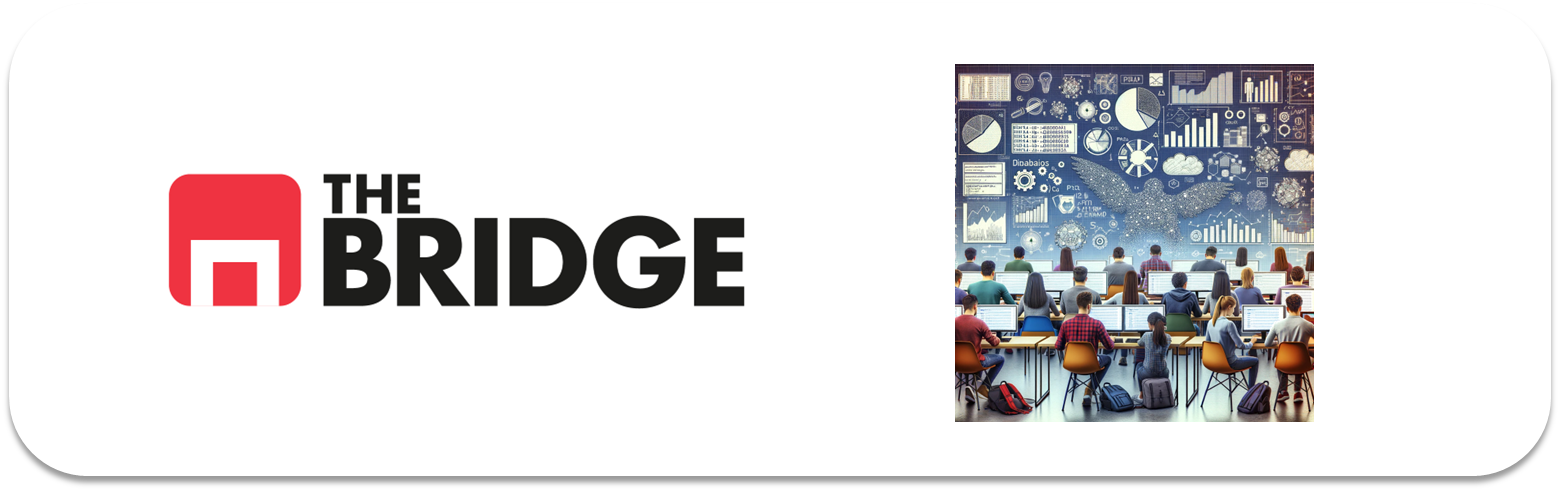

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [6]:
df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", delimiter='|')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### 2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.

#### -> variable Target : MEDV
#### Tipo de modelo supervisado porque ya esta etiquetado la target

<Axes: xlabel='MEDV', ylabel='Count'>

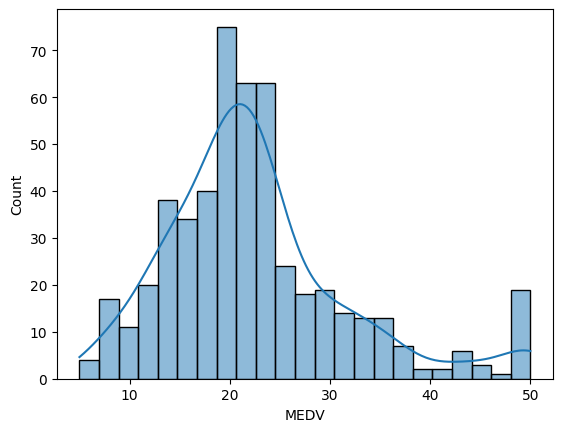

In [9]:
sns.histplot(df["MEDV"], kde= True)

-> tiene bastante pinta de distribucion normal -> regresion lineal

In [11]:
target = "MEDV"

#### 3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
#### 4. Construye las parejas X,y de train y test

In [14]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [16]:
# Features
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT']]

# Target
y = df["MEDV"]

-> split del dataset en train y test al 80/20 empleando la función de sklearn

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(506, 12)
(404, 12)
(102, 12)
(404,)
(102,)


#### 5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

Veamos las correlaciones entre la Target y las variables:

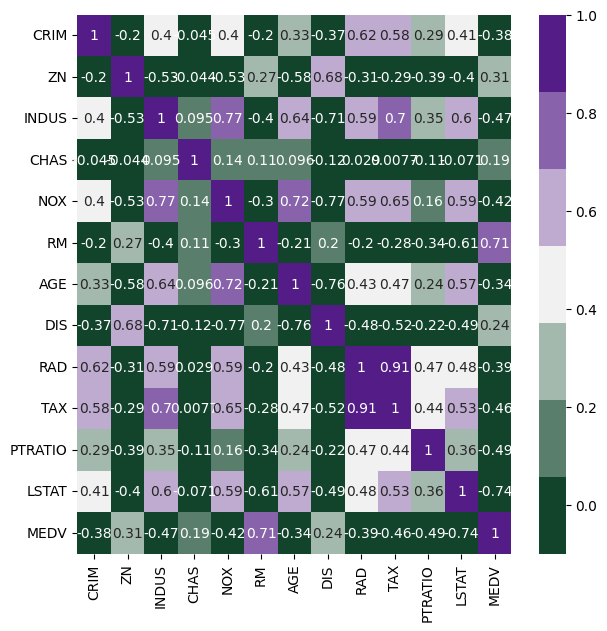

In [19]:
plt.figure(figsize=(7,7))
sns.heatmap(train_set.corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

- La variable más correlacionada con la respuesta MEDV es RM (RM: Número promedio de habitaciones por vivienda). Por lo tanto, en un análisis de datos, la variable RM debe incluirse como predictor.
- También, podemos observar que hay otras correlaciones entre las posibles features, entre RAD y TAX, AGE y NOX, NOX y INDUS
  
Voy a verlo de otra manera:

In [24]:
corr_matrix = train_set.corr(numeric_only= True)
corr_matrix["MEDV"].sort_values(ascending = False)

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

- La variable más correlacionada con la respuesta MEDV es RM, y las siguientes son ZN (ZN: Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados), DIS (DIS: Distancias ponderadas a cinco centros de empleo de Boston),  y CHAS (CHAS: Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)
 


### Lista de Features

Para terminar, hacemos nuestra lista de features:

1. RM
2. ZN
3. DIS
4. CHAS



In [27]:
# lista de los features
features_num = ["RM","ZN","DIS","CHAS"]

Vamos a mostrar gráficamente la relación entre la respuesta MEDV y la característica RM.

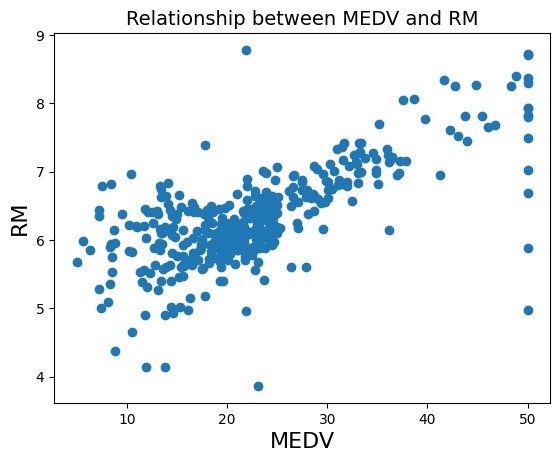

In [21]:
plt.scatter(train_set['MEDV'], train_set['RM'])
plt.xlabel('MEDV', fontsize=16)
plt.ylabel('RM', fontsize=16)
plt.title("Relationship between MEDV and RM", fontsize=14)
plt.show()

SI que parece haber una correlacion

#### 6. Trata las variables para que funcionen lo mejor posible en el modelo.

#### Las variables y features numéricas tienen escalas y rangos de valores muy diferentes. 

#### -> Standardization

In [28]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
resultado_standardization = pd.DataFrame(std_scaler.fit_transform(train_set[features_num]),columns = features_num)
resultado_standardization.head()

,RM,ZN,DIS,CHAS
0,-1.428069,-0.500320,-0.802173,-0.278089
1,-0.680087,-0.500320,0.324349,-0.278089
2,-0.402063,1.013271,1.330697,-0.278089
3,-0.300450,-0.500320,-0.839240,-0.278089
4,-0.831094,-0.500320,-0.005494,-0.278089


In [29]:
resultado_standardization.describe()

,RM,ZN,DIS,CHAS
count,4.040000e+02,404.000000,4.040000e+02,4.040000e+02
mean,-2.616169e-16,0.000000,5.248827e-17,1.319077e-17
std,1.001240e+00,1.001240,1.001240e+00,1.001240e+00
min,-3.461733e+00,-0.500320,-1.258391e+00,-2.780887e-01
25%,-6.003488e-01,-0.500320,-8.081981e-01,-2.780887e-01
50%,-1.494427e-01,-0.500320,-2.971196e-01,-2.780887e-01
75%,4.528240e-01,0.364589,7.481981e-01,-2.780887e-01
max,3.477564e+00,3.824227,3.907900e+00,3.595975e+00


-> En este caso lo que se busca es que la media sea 0 o casi y la desviación estándar 1 o casi. 

El valor medio de las viviendas ocupadas por sus propietarios en miles de dólares ("MEDV") esta divididdo por 1000 dolares pero además se han limitado los valores medios por encima de 50000 a 50).

Observamos la distribucion para el resto de las features:

<Axes: >

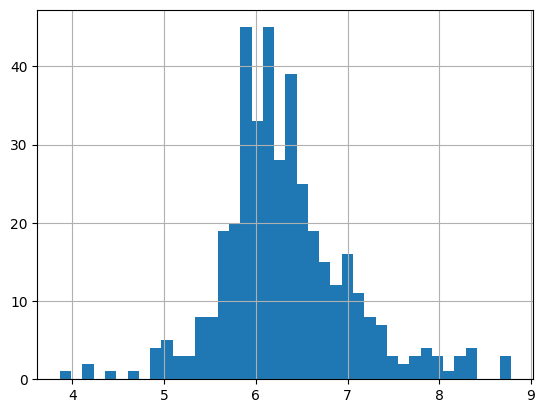

In [30]:
train_set["RM"].hist(bins = 40)

-> Bien, seguimos

<Axes: >

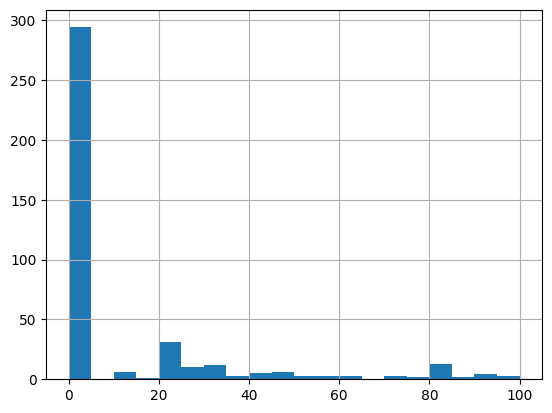

In [45]:
train_set["ZN"].hist(bins = 20)

-> efecto heavy-tail que provoca que cuando escalemos los valores se van a concentrar en rangos muy pequeños.  
-> Veamos DIS y CHAS

<Axes: >

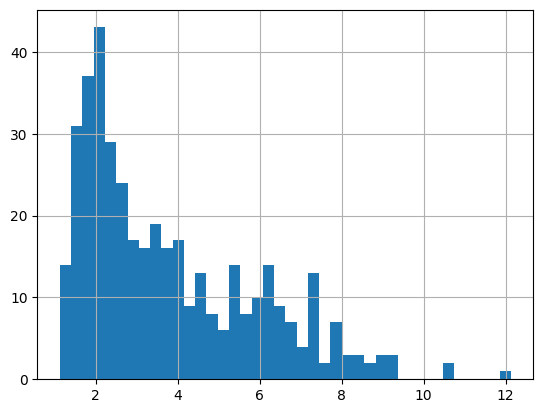

In [33]:
train_set["DIS"].hist(bins = 40)

<Axes: >

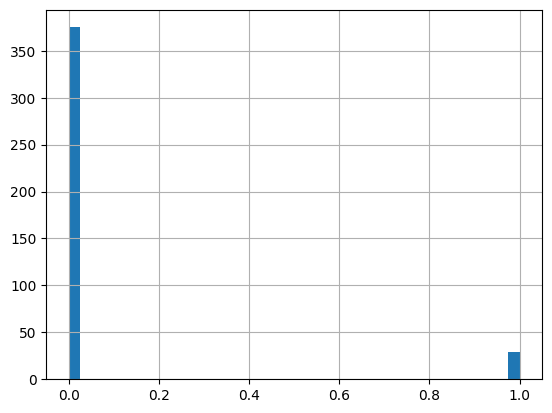

In [34]:
train_set["CHAS"].hist(bins = 40)

- Parece ocurrir el efecto heavy tail con DIS también.
- Aplicaremos la transformación *log* a ZN y DIS:

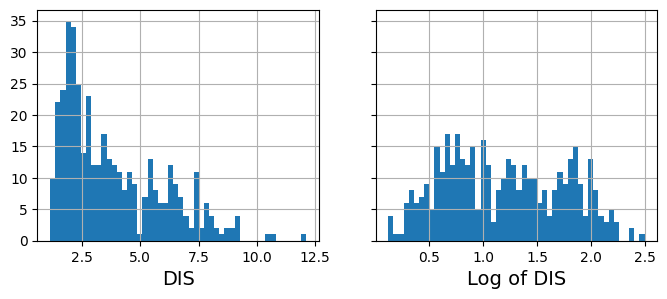

In [40]:
# extra code – this cell generates Figure 2–17
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
train_set["DIS"].hist(ax=axs[0], bins=50)
train_set["DIS"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("DIS")
axs[1].set_xlabel("Log of DIS")
plt.show()

In [74]:
train_set["DIS"] = train_set["DIS"].apply(np.log)
#train_set["DIS_tr"]= std_scaler.fit_transform(train_set[["DIS"]])

<Axes: >

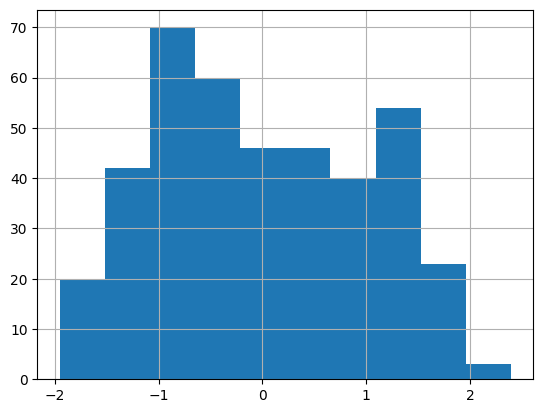

In [75]:
train_set["DIS_tr"].hist()

-> Ahora, DIS_tr tiene mejor pinta y parece mas con una distribucion normal.

- Hacemos lo mismo con ZN
- - Da error "Input X contains infinity or a value too large for dtype('float64')." Supongo que es porque la variable ZN tiene valores igual a cero.
  - voy a añadir un epsilon para que no ocurra

In [76]:
epsilon = 1e-8  # Pequeño valor constante
train_set["ZN"] = np.log(train_set["ZN"] + epsilon)
#train_set["ZN_tr"]= std_scaler.fit_transform(train_set[["ZN"]])

-> Observo ahora que CHAS es una categorica ya transformada en numerica, y no tiene sentido escalarla, asi que vuelvo a hacer toda la standardization:
- con RM, ya que tiene una distribucion normal, ZN, y DIS que he tranformado (log) para tener distribucion normal

In [87]:
f_num = ['ZN', 'CHAS', 'RM','DIS']

std_scaler = StandardScaler()
resultado_standardization = pd.DataFrame(std_scaler.fit_transform(train_set[f_num]),columns = f_num)
resultado_standardization.head()

,ZN,CHAS,RM,DIS
0,-0.611371,-0.278089,-1.428069,-0.815544
1,-0.611371,-0.278089,-0.680087,0.578613
2,1.632279,-0.278089,-0.402063,1.291625
3,-0.611371,-0.278089,-0.300450,-0.885632
4,-0.611371,-0.278089,-0.831094,0.267948


array([[<Axes: title={'center': 'ZN'}>, <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'RM'}>, <Axes: title={'center': 'DIS'}>]],
      dtype=object)

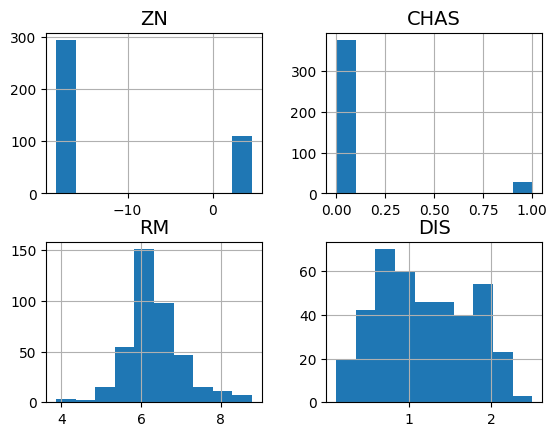

In [88]:
train_set[f_num].hist()

In [113]:
X_train = train_set[f_num].copy()
X_test = test_set[f_num].copy()

-> no estoy muy convencido para ZN pero bueno, siguo.

#### 7. Construye un modelo de regresión lineal.

In [114]:
lin_reg = LinearRegression()

In [115]:
# primero separamos la variable target del dataset de train y además solo nos quedamos con las features:
X = train_set[f_num].copy()

y= train_set[target]

- Cómo solo tenemos un modelo no hace falta emplear la cross-validation para comprobar sus prestaciones con otro.
- Y ahora entrenamos/creamos el modelo:

In [116]:
lin_reg.fit(X,y)

LinearRegression()

#### 8. Analiza si lo crees conveniente los pesos y la importancia de las features.

In [108]:
lin_reg.coef_

array([0.11049836, 4.70978588, 8.49251207, 0.97542764])

In [109]:
lin_reg.intercept_

-30.964100307137514

In [117]:
# lo muestro como un dataframe
pd.DataFrame(lin_reg.coef_, f_num,columns=['Coefficient'])

,Coefficient
ZN,0.110498
CHAS,4.709786
RM,8.492512
DIS,0.975428


#### Visualizo la regresión -> y = -30.9641 + 8.492512.RM + 0.110498.ZN + 0.975428.DIS + 4.709786.CHAS

#### 9. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.

Muestro las predicciones para el dataset de test y muestra la diferencia con los valores reales:

In [118]:
predictions = lin_reg.predict(X_test)
predictions

array([26.10513132, 39.53542018, 21.6687958 , 25.70036399, 24.82325596,
       26.31301089, 23.16096106, 23.04096105, 24.95890029, 22.65708329,
       27.102928  , 27.83628819,  9.03101587, 26.85212667, 22.11625005,
       30.78429464, 20.92037865, 12.02980085, 50.26390629, 23.76811402,
       28.55931119, 32.54286028, 21.68260637, 27.44472674, 21.87046386,
       17.4948568 , 23.31287611, 28.60828586, 28.14288804, 21.06313418,
       18.88848467, 28.03761394, 32.42559589, 16.62465902, 22.49432851,
       19.10296527, 34.89964558, 23.98101259, 29.37931164, 27.22901616,
       17.54037157, 33.95205421, 52.75432424, 24.2625705 , 26.54866456,
       19.43278252, 21.14585059, 28.68972824, 24.36808386, 30.85263605,
       27.52232949, 35.5375163 , 25.07608703, 29.40954295, 37.4863602 ,
       26.53425042, 23.80636961, 41.13386417, 27.9565182 , 26.82682305,
       37.00951571, 49.02587583, 27.97100463, 19.07425661, 41.98516069,
       22.9094522 , 25.6742408 , 30.58616176, 38.5997758 , 22.30

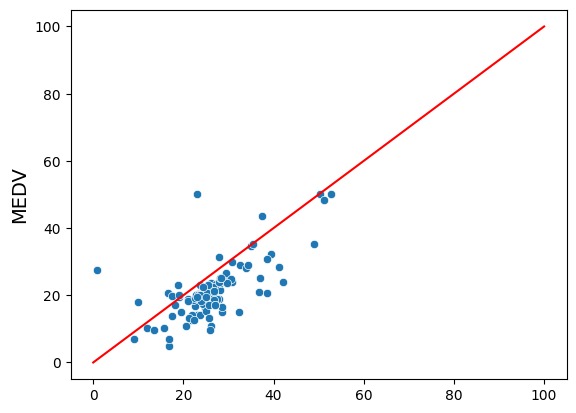

In [125]:
sns.scatterplot(x=predictions,y=y_test_reset_index);
plt.plot([0, 100],[0,100],'red')
plt.show()

*Para train*

In [126]:
y_pred = lin_reg.predict(X_train)

argumentos = (y_train, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', lin_reg.score(X_train, y_train))

MSE: 39.97335335379829
RMSE: 6.322448367033003
MAE: 4.411684864654027
MAPE: 0.24856120201573484
R2: 0.5398666152110247


*Para test*

In [127]:
y_pred = lin_reg.predict(X_test)

argumentos = (y_test, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', lin_reg.score(X_test, y_test))

MSE: 68.4925093340313
RMSE: 8.276020138570912
MAE: 6.594442518004274
MAPE: 0.3804377705500575
R2: 0.06601696541016622


*Ha empeorado en todas las métricas, con un MAPE por ejemplo que ha subido hasta el 38%, y el RMSE también ha aumentado un porcetanje sensible. No es muy mala generalización pero podríamos intentar mejorarla. Veamos que tal con la regularización*

#### 10. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.

In [128]:
elastic_reg = ElasticNet(alpha= 0.2, l1_ratio= 0.7)

elastic_reg.fit(X_train,y_train)

ElasticNet(alpha=0.2, l1_ratio=0.7)

In [156]:
elastic_net = ElasticNet(alpha = 0.5, l1_ratio = 0.5)
elastic_net.fit(X_train, y_train)

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

Train MSE: 46.6676
Test MSE: 68.5321


In [157]:
elastic_net = ElasticNet(alpha = 0.02, l1_ratio=1)
elastic_net.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

Train MSE: 39.9826
Test MSE: 65.5784


In [132]:
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=0.1)
lassoR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lin_reg.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lin_reg.predict(X_test)),2))

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE sin regularización: 39.97
Test MSE sin regularización: 68.49
Train MSE: 40.2049
Test MSE: 55.8926


Valor alpha = 0.1

In [150]:
lassoR = Lasso(alpha = 0.4) #JUGAR CON EL VALOR DEL ALPHA PARA AUMENTAR LO MINIMO POSIBLE EL Train MSE sin regularización, Y BAJAR LO MAXIMO POSIBLE EL Test MSE sin regularización:
lassoR.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE: 41.8036
Test MSE: 52.5906


Valor alpha = 0.4

In [154]:
lassoR = Lasso(alpha = 0.34) #JUGAR CON EL VALOR DEL ALPHA PARA AUMENTAR LO MINIMO POSIBLE EL Train MSE sin regularización, Y BAJAR LO MAXIMO POSIBLE EL Test MSE sin regularización:
lassoR.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE: 41.7095
Test MSE: 52.2416


Valor alpha = 0.34

In [155]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 10) # alpha es lambda 
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lin_reg.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lin_reg.predict(X_test)),2))

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))
# print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))

Train MSE sin regularización: 39.97
Test MSE sin regularización: 68.49
Train MSE: 40.16
Test MSE: 66.84


#### 11. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?

- El mejor modelo es con LASSO, con un valor del hiperparametro igual a 0.4, porque la diferencia entre Tain MSE y Test MSE en este caso es la mas pequeña.